<a href="https://colab.research.google.com/github/Bobby9800/STATSANDSCANS/blob/main/Airlines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import pandas as pd

# Load the Flights dataset
df = sns.load_dataset('flights')

# Display the first few rows
df.head()


,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [2]:
# Display basic info
df.info()

# Example: Adding a 'city' column with hypothetical data
import numpy as np

df['city'] = np.random.choice(['New York', 'Los Angeles', 'Chicago', 'Houston', 'Miami'], size=len(df))

# Hypothetical coordinates for cities
city_coords = {
    'New York': {'latitude': 40.7128, 'longitude': -74.0060},
    'Los Angeles': {'latitude': 34.0522, 'longitude': -118.2437},
    'Chicago': {'latitude': 41.8781, 'longitude': -87.6298},
    'Houston': {'latitude': 29.7604, 'longitude': -95.3698},
    'Miami': {'latitude': 25.7617, 'longitude': -80.1918}
}

# Add the coordinates to the DataFrame
df['latitude'] = df['city'].map(lambda x: city_coords[x]['latitude'])
df['longitude'] = df['city'].map(lambda x: city_coords[x]['longitude'])

# Display the enhanced DataFrame
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


,year,month,passengers,city,latitude,longitude
0,1949,Jan,112,Houston,29.7604,-95.3698
1,1949,Feb,118,Los Angeles,34.0522,-118.2437
2,1949,Mar,132,Houston,29.7604,-95.3698
3,1949,Apr,129,New York,40.7128,-74.0060
4,1949,May,121,Miami,25.7617,-80.1918


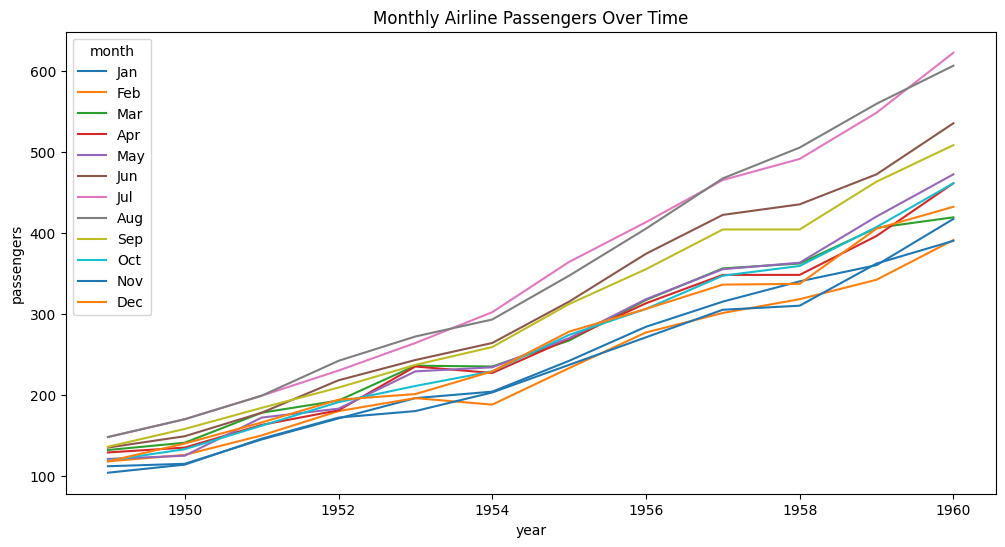

In [3]:
import matplotlib.pyplot as plt

# Line plot of passengers over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='passengers', hue='month', data=df, palette="tab10")
plt.title('Monthly Airline Passengers Over Time')
plt.show()


In [4]:
# Pivot the data to create a heatmap
flights_pivot = df.pivot('month', 'year', 'passengers')

plt.figure(figsize=(12, 8))
sns.heatmap(flights_pivot, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Heatmap of Airline Passenger Traffic')
plt.show()


TypeError: DataFrame.pivot() takes 1 positional argument but 4 were given

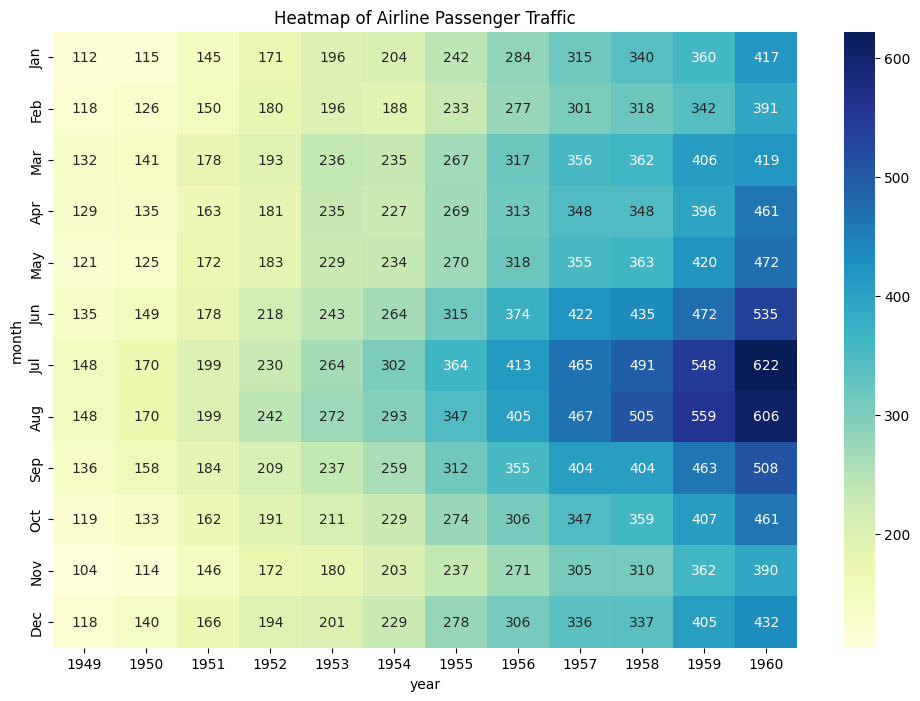

In [10]:
# Pivot the data to create a heatmap
flights_pivot = df.pivot(index='month', columns='year', values='passengers')

plt.figure(figsize=(12, 8))
sns.heatmap(flights_pivot, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Heatmap of Airline Passenger Traffic')
plt.show()


In [6]:
import folium

# Create a map centered on the USA
map = folium.Map(location=[39.8283, -98.5795], zoom_start=4)

# Add markers for each city
for index, row in df.drop_duplicates(subset=['city']).iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=row['city']).add_to(map)

map.save('flights_map.html')
map


In [7]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Graph(id='passenger-line-chart'),
    dcc.Graph(id='passenger-heatmap'),
])

@app.callback(
    Output('passenger-line-chart', 'figure'),
    Input('city-dropdown', 'value')
)
def update_line_chart(selected_city):
    filtered_df = df[df['city'] == selected_city]
    fig = sns.lineplot(x='year', y='passengers', hue='month', data=filtered_df, palette="tab10")
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)


ModuleNotFoundError: No module named 'dash'

In [8]:
!pip install dash


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 20.0 MB/s eta 0:00:00


In [9]:
!pip install dash

import dash
from dash import dcc, html
from dash.dependencies import Input, Output

app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Graph(id='passenger-line-chart'),
    dcc.Graph(id='passenger-heatmap'),
])

@app.callback(
    Output('passenger-line-chart', 'figure'),
    Input('city-dropdown', 'value')
)
def update_line_chart(selected_city):
    filtered_df = df[df['city'] == selected_city]
    fig = sns.lineplot(x='year', y='passengers', hue='month', data=filtered_df, palette="tab10")
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>